# Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv("HF Data.csv", encoding='ISO-8859-1')
# Print shape of dataset
print(df.shape)

(500, 66)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

In [2]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Brain Natriuretic Peptide (BNP) 0.2 % missing values


In [3]:
features_with_na

['Brain Natriuretic Peptide (BNP)']

* **There are no null values in the dataset**

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [4]:
df.duplicated().sum()

0

* **No Duplicates in the dataset**

**Remove 'StudyID', 'UHID', 'SN' from the dataset as it cannot used in Model Training**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 66 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   StudyID                                                      500 non-null    object 
 1   UHID                                                         500 non-null    int64  
 2   SN                                                           500 non-null    int64  
 3   Acute Coronary Syndrome  (ACS)                               500 non-null    object 
 4   Irregular Heartbeat (Arrhythmia)                             500 non-null    object 
 5   Bronchial Asthma (BA)                                        500 non-null    object 
 6   Coronary Artery Disease (CAD)                                500 non-null    object 
 7   Chest X-ray (CXR)                                            500 non-null    obj

In [6]:
df.drop(['StudyID', 'UHID', 'SN'], inplace=True, axis=1)

# Feature Engineering

## Feature Extraction

In [7]:
df.head()

,Acute Coronary Syndrome (ACS),Irregular Heartbeat (Arrhythmia),Bronchial Asthma (BA),Coronary Artery Disease (CAD),Chest X-ray (CXR),Dyslipidemia : Abnormal Cholesterol Levels (DL),Diabetes Mellitus (DM),Electrocardiogram (ECG),Family History of Cardiovascular Disease (FH),Hypertension (HTN),Left Ventricular Ejection Fraction (%) (LVEF),Myocardial Infarction (Heart Attack) (MI),Myocardial Performance Index ( MPI),Mitral Regurgitation (MR),Rhythm of Pulse (RP),Recurrent Myocardial Infarction (ReMI),Route of Thrombolysis Administration ( RTA),Regional Wall Motion Abnormality (RWMA),Gender of the Patient,Smoking Status,Wall Motion Abnormality (Wall),Euro Score : Cardiac Surgery Risk Score,Grace Score : Risk of Death or MI in ACS Patients,Major Adverse Cardiac Events (MACES),New York Heart Association (NYHA),ST-Segment Resolution (STR),Thrombolysis,E/A Ratio (E/A),Respiratory Rate (breaths per minute) (RR),Patient's Age,Absolute Lymphocyte Count (ALC),Body Mass Index (kg/m_) (BMI),Brain Natriuretic Peptide (BNP),Chloride (mmol/L) (Cl),Kidney Function Marker (mg/dL) : Creatinine,Diastolic Blood Pressure (mmHg) (DBP),Deceleration Time of Mitral Inflow (ms) (DT),Fractional Shortening (%) (FS),Hemoglobin (g/dL) (Hb),Glycated Hemoglobin (HbA1C),Bicarbonate (mmol/L) (HCO3),High-Density Lipoprotein Cholesterol (HDLc),Height (cm or m),Heart Rate (HR),Invasive Coronary Treatment (ICT),Invasive Revascularization Therapy (IRT),Potassium (mmol/L) (K),Left Atrial Volume (mL) (LAV),Left Atrial Volume Index (mL/m_) (LAV),Low-Density Lipoprotein Cholesterol (LDLc),Left Ventricular Internal Diameter in Diastole (mm) (LVIDd),Left Ventricular Internal Diameter in Systole (mm) (LVIDs),LVOT Velocity (LVOT VTI),Sodium (mmol/L) (Na),Random Blood Sugar (mg/dL) (RBS),Systolic Blood Pressure (mmHg) (SBP),Total Cholesterol (mg/dL) (TC),Triglycerides (mg/dL) (TG),Troponin I (TropI),Weight (kg),Obisity,Chest_pain,Heart Failure (HF)
0,ST-Elevation Myocardial Infarction (STEMI),No Arrhythmia,No,Normal,Normal,No,No,Normal,Yes,No,65,No,0.27,Nil,Regular,No,Radial Route,No,Male,No,No,0.6,0.3,0.99,Mild symptoms,No Resolution,N/A,1.05,20,60,2.3,22.58,15.0,101,0.93,110,172,34,13.5,5.6,21,Risk,1.63,72,88,69,3.98,46,27.88,90,36,24,16,140,4.9,180,100,95,0.001,60,Obese,Absent,No HF
1,ST-Elevation Myocardial Infarction (STEMI),No Arrhythmia,No,Normal,Normal,No,No,Normal,No,No,65,No,0.12,Nil,Regular,No,Radial Route,No,Male,No,No,0.4,0.2,0.99,No symptoms,No Resolution,N/A,0.90,18,75,2.6,22.68,18.0,105,1.21,90,236,36,15.1,5.3,24,Risk,1.68,90,74,92,3.80,50,28.90,85,48,31,17,137,6.5,140,110,85,0.005,64,No Obese,Absent,No HF
2,ST-Elevation Myocardial Infarction (STEMI),No Arrhythmia,No,Normal,Normal,No,No,Normal,Yes,Yes,62,No,0.31,Nil,Regular,No,Radial Route,No,Male,Current,No,0.5,0.4,0.99,No symptoms,Resolution ( >=50%),N/A,0.97,19,47,1.8,28.40,17.0,105,0.99,80,180,25,11.1,5.7,26,Risk,1.73,78,60,69,3.90,20,9.90,82,52,39,24,139,4.9,140,130,100,6.500,85,No Obese,Absent,No HF
3,ST-Elevation Myocardial Infarction (STEMI),No Arrhythmia,No,Normal,Normal,No,Yes,Normal,No,No,63,No,0.32,Nil,Regular,No,Radial Route,No,Female,No,No,0.7,0.3,0.99,Mild symptoms,No Resolution,N/A,0.82,13,73,2.1,23.38,20.0,99,1.55,60,172,33,14.2,6.9,37,Risk,1.68,50,74,74,4.20,22,13.10,75,51,34,23,141,5.4,130,135,120,0.001,66,No Obese,Absent,No HF
4,ST-Elevation Myocardial Infarction (STEMI),No Arrhythmia,No,Normal,Normal,Yes,No,Normal,Yes,No,60,No,0.07,Nil,Regular,No,Radial Route,No,Male,No,No,0.4,0.2,0.99,No symptoms,No Resolution,N/A,0.88,19,48,2.5,24.80,22.0,105,0.90,80,97,32,13.5,4.9,24,Risk,1.68,74,83,83,4.00,32,17.71,150,46,31,21,141,6.0,130,220,190,0.003,70,Obese,Absent,No HF


In [11]:
df.head()

,Acute Coronary Syndrome (ACS),Irregular Heartbeat (Arrhythmia),Bronchial Asthma (BA),Coronary Artery Disease (CAD),Chest X-ray (CXR),Dyslipidemia : Abnormal Cholesterol Levels (DL),Diabetes Mellitus (DM),Electrocardiogram (ECG),Family History of Cardiovascular Disease (FH),Hypertension (HTN),Left Ventricular Ejection Fraction (%) (LVEF),Myocardial Infarction (Heart Attack) (MI),Myocardial Performance Index ( MPI),Mitral Regurgitation (MR),Rhythm of Pulse (RP),Recurrent Myocardial Infarction (ReMI),Route of Thrombolysis Administration ( RTA),Regional Wall Motion Abnormality (RWMA),Gender of the Patient,Smoking Status,Wall Motion Abnormality (Wall),Euro Score : Cardiac Surgery Risk Score,Grace Score : Risk of Death or MI in ACS Patients,Major Adverse Cardiac Events (MACES),New York Heart Association (NYHA),ST-Segment Resolution (STR),Thrombolysis,E/A Ratio (E/A),Respiratory Rate (breaths per minute) (RR),Patient's Age,Absolute Lymphocyte Count (ALC),Body Mass Index (kg/m²) (BMI),Brain Natriuretic Peptide (BNP),Chloride (mmol/L) (Cl),Kidney Function Marker (mg/dL) : Creatinine,Diastolic Blood Pressure (mmHg) (DBP),Deceleration Time of Mitral Inflow (ms) (DT),Fractional Shortening (%) (FS),Hemoglobin (g/dL) (Hb),Glycated Hemoglobin (HbA1C),Bicarbonate (mmol/L) (HCO3),High-Density Lipoprotein Cholesterol (HDLc),Height (cm or m),Heart Rate (HR),Invasive Coronary Treatment (ICT),Invasive Revascularization Therapy (IRT),Potassium (mmol/L) (K),Left Atrial Volume (mL) (LAV),Left Atrial Volume Index (mL/m²) (LAV),Low-Density Lipoprotein Cholesterol (LDLc),Left Ventricular Internal Diameter in Diastole (mm) (LVIDd),Left Ventricular Internal Diameter in Systole (mm) (LVIDs),LVOT Velocity (LVOT VTI),Sodium (mmol/L) (Na),Random Blood Sugar (mg/dL) (RBS),Systolic Blood Pressure (mmHg) (SBP),Total Cholesterol (mg/dL) (TC),Triglycerides (mg/dL) (TG),Troponin I (TropI),Weight (kg),Obisity,Chest_pain,Heart Failure (HF)
0,ST-Elevation Myocardial Infarction (STEMI),No Arrhythmia,No,Normal,Normal,No,No,Normal,Yes,No,65,No,0.27,Nil,Regular,No,Radial Route,No,Male,No,No,0.6,0.3,0.99,Mild symptoms,No Resolution,N/A,1.05,20,60,2.3,22.58,15.0,101,0.93,110,172,34,13.5,5.6,21,Risk,1.63,72,88,69,3.98,46,27.88,90,36,24,16,140,4.9,180,100,95,0.001,60,Obese,Absent,No HF
1,ST-Elevation Myocardial Infarction (STEMI),No Arrhythmia,No,Normal,Normal,No,No,Normal,No,No,65,No,0.12,Nil,Regular,No,Radial Route,No,Male,No,No,0.4,0.2,0.99,No symptoms,No Resolution,N/A,0.90,18,75,2.6,22.68,18.0,105,1.21,90,236,36,15.1,5.3,24,Risk,1.68,90,74,92,3.80,50,28.90,85,48,31,17,137,6.5,140,110,85,0.005,64,No Obese,Absent,No HF
2,ST-Elevation Myocardial Infarction (STEMI),No Arrhythmia,No,Normal,Normal,No,No,Normal,Yes,Yes,62,No,0.31,Nil,Regular,No,Radial Route,No,Male,Current,No,0.5,0.4,0.99,No symptoms,Resolution ( >=50%),N/A,0.97,19,47,1.8,28.40,17.0,105,0.99,80,180,25,11.1,5.7,26,Risk,1.73,78,60,69,3.90,20,9.90,82,52,39,24,139,4.9,140,130,100,6.500,85,No Obese,Absent,No HF
3,ST-Elevation Myocardial Infarction (STEMI),No Arrhythmia,No,Normal,Normal,No,Yes,Normal,No,No,63,No,0.32,Nil,Regular,No,Radial Route,No,Female,No,No,0.7,0.3,0.99,Mild symptoms,No Resolution,N/A,0.82,13,73,2.1,23.38,20.0,99,1.55,60,172,33,14.2,6.9,37,Risk,1.68,50,74,74,4.20,22,13.10,75,51,34,23,141,5.4,130,135,120,0.001,66,No Obese,Absent,No HF
4,ST-Elevation Myocardial Infarction (STEMI),No Arrhythmia,No,Normal,Normal,Yes,No,Normal,Yes,No,60,No,0.07,Nil,Regular,No,Radial Route,No,Male,No,No,0.4,0.2,0.99,No symptoms,No Resolution,N/A,0.88,19,48,2.5,24.80,22.0,105,0.90,80,97,32,13.5,4.9,24,Risk,1.68,74,83,83,4.00,32,17.71,150,46,31,21,141,6.0,130,220,190,0.003,70,Obese,Absent,No HF


### Type of Features

**Numeric Features**

In [10]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 37


**Categorical Features**

In [11]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 26


**Discrete features**

In [38]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 7


**Continues Features**

In [13]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 30


### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Heart Failure (HF)” column.**


In [14]:
X = df.drop('Heart Failure (HF)', axis=1)
y = df['Heart Failure (HF)']

In [15]:
y.head()

0       No HF
1       No HF
2       No HF
3       No HF
4       No HF
Name: Heart Failure (HF), dtype: object

**Manual encoding target column**

In [33]:
df['Heart Failure (HF)'].value_counts()

Heart Failure (HF)
   HF       274
   No HF    226
Name: count, dtype: int64

In [34]:
# the target column has 'HF' and 'No HF', it is encoded as 1, others as 0
# Encode the target column: 'HF' as 1, 'No HF' as 0
y = np.where(y == 'HF', 1, 0)


In [31]:
# Encode target column: 'HF' -> 1, all others -> 0
y = np.where(y == 'HF', 1, 0)


In [35]:
# Display the encoded array
y

array(0)

## Feature Transformation

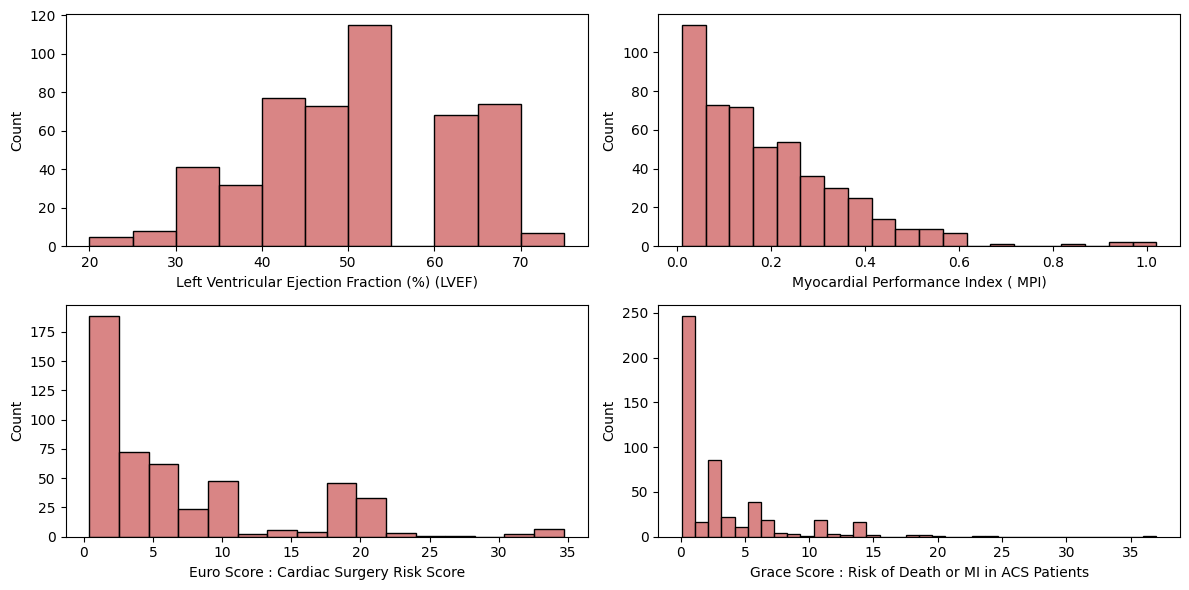

In [36]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(continuous_features[:4]):  # Use the first 4 continuous features as an example
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**Checking Skewness**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [39]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

Left Ventricular Ejection Fraction (%) (LVEF)                 -0.101949
Myocardial Performance Index ( MPI)                            1.565046
Euro Score : Cardiac Surgery Risk Score                        1.299718
Grace Score : Risk of Death or MI in ACS Patients              2.541661
E/A Ratio (E/A)                                                3.072172
Patient's Age                                                 -0.157441
Absolute Lymphocyte Count (ALC)                                0.539826
Body Mass Index (kg/m_) (BMI)                                  0.992472
Brain Natriuretic Peptide (BNP)                                3.252668
Kidney Function Marker (mg/dL) : Creatinine                    8.097345
Deceleration Time of Mitral Inflow (ms) (DT)                   0.885607
Fractional Shortening (%) (FS)                                 0.232685
Hemoglobin (g/dL) (Hb)                                         0.106252
Glycated Hemoglobin (HbA1C)                                    1

- Positiviely Skewed : company_age, no_of_employees.
- We can handle outliers and then check the skewness.

## Apply Power Transformer to Check if it can reduces the outliers

In [40]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
# Use continuous_features for transformation
transform_features = continuous_features
X_copy = pd.DataFrame(pt.fit_transform(X[transform_features]), columns=transform_features)

In [41]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

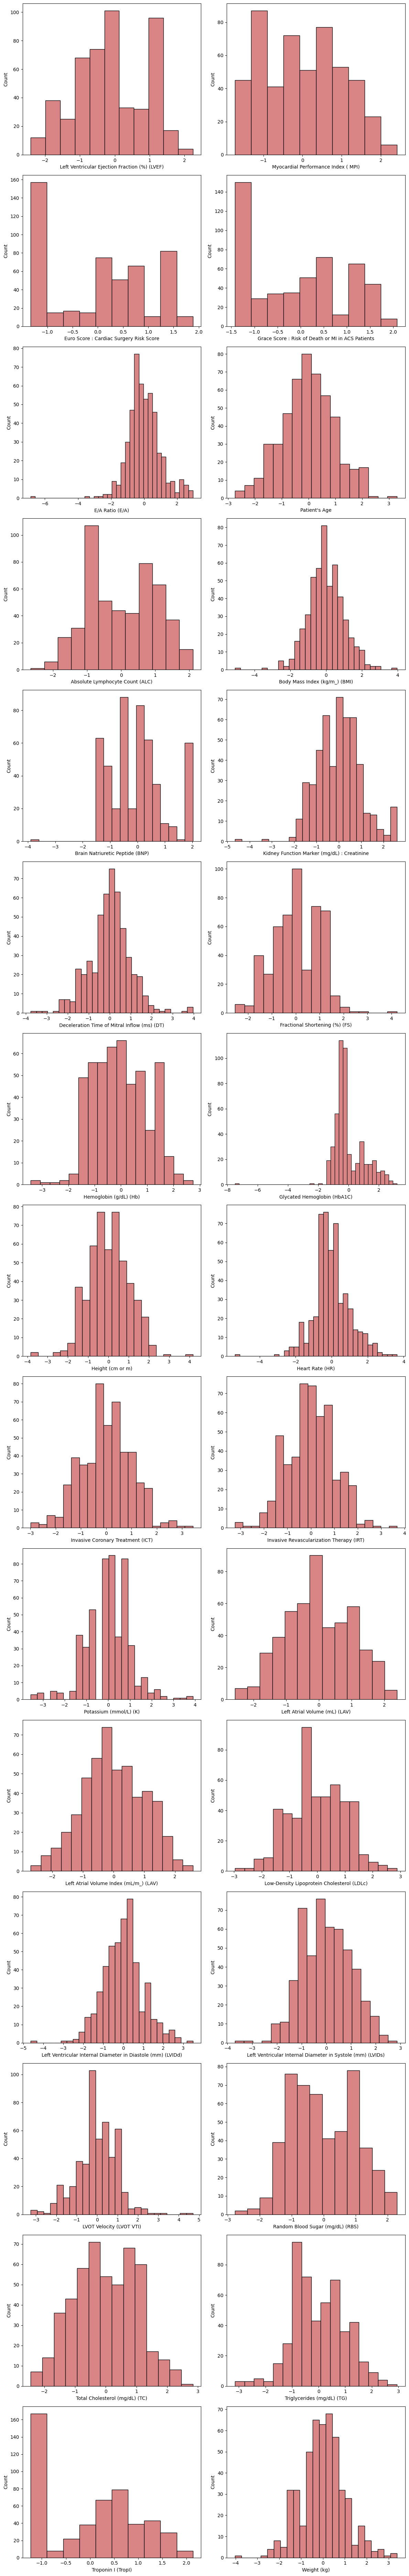

In [42]:
import math

# Calculate the number of rows and columns for subplots
num_features = len(transform_features)
num_cols = 2  # Number of columns
num_rows = math.ceil(num_features / num_cols)  # Calculate rows dynamically

plt.figure(figsize=(12, 5 * num_rows))  # Adjust figure size based on rows
for i, col in enumerate(transform_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**Checking Skewness**

In [43]:
X_copy.skew(axis=0, skipna=True)

Left Ventricular Ejection Fraction (%) (LVEF)                 -0.069254
Myocardial Performance Index ( MPI)                            0.138650
Euro Score : Cardiac Surgery Risk Score                        0.018954
Grace Score : Risk of Death or MI in ACS Patients              0.190363
E/A Ratio (E/A)                                               -0.265146
Patient's Age                                                 -0.024338
Absolute Lymphocyte Count (ALC)                                0.042838
Body Mass Index (kg/m_) (BMI)                                 -0.025282
Brain Natriuretic Peptide (BNP)                                0.385829
Kidney Function Marker (mg/dL) : Creatinine                    0.090260
Deceleration Time of Mitral Inflow (ms) (DT)                   0.051926
Fractional Shortening (%) (FS)                                -0.017980
Hemoglobin (g/dL) (Hb)                                        -0.006566
Glycated Hemoglobin (HbA1C)                                    0

- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [44]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

Acute Coronary Syndrome  (ACS) : 3
Irregular Heartbeat (Arrhythmia) : 2
Bronchial Asthma (BA) : 2
Coronary Artery Disease (CAD) : 9
Chest X-ray (CXR) : 2
Dyslipidemia : Abnormal Cholesterol Levels (DL) : 2
Diabetes Mellitus (DM) : 2
Electrocardiogram (ECG) : 7
Family History of Cardiovascular Disease (FH) : 2
Hypertension (HTN) : 2
Myocardial Infarction (Heart Attack) (MI) : 2
Mitral Regurgitation (MR) : 5
Rhythm of Pulse (RP) : 2
Recurrent Myocardial Infarction (ReMI) : 2
Route of Thrombolysis Administration ( RTA) : 3
Regional Wall Motion Abnormality (RWMA) : 2
Gender of the Patient : 2
Smoking Status : 3
Wall Motion Abnormality (Wall) : 9
New York Heart Association (NYHA) : 4
ST-Segment Resolution  (STR) : 3
Thrombolysis : 4
High-Density Lipoprotein Cholesterol (HDLc) : 2
Obisity : 2
Chest_pain : 2
Heart Failure (HF) : 2


## Feature Encoding and Scaling

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting number features for preprocessing**

In [45]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [46]:
num_features

['Left Ventricular Ejection Fraction (%) (LVEF)',
 'Myocardial Performance Index ( MPI)',
 'Euro Score : Cardiac Surgery Risk Score',
 'Grace Score : Risk of Death or MI in ACS Patients',
 'Major Adverse Cardiac Events  (MACES)',
 'E/A Ratio (E/A)',
 'Respiratory Rate (breaths per minute) (RR)',
 "Patient's Age",
 'Absolute Lymphocyte Count (ALC)',
 'Body Mass Index (kg/m_) (BMI)',
 'Brain Natriuretic Peptide (BNP)',
 'Chloride (mmol/L) (Cl)',
 'Kidney Function Marker (mg/dL) : Creatinine',
 'Diastolic Blood Pressure (mmHg) (DBP)',
 'Deceleration Time of Mitral Inflow (ms) (DT)',
 'Fractional Shortening (%) (FS)',
 'Hemoglobin (g/dL) (Hb)',
 'Glycated Hemoglobin (HbA1C)',
 'Bicarbonate (mmol/L) (HCO3)',
 'Height (cm or m)',
 'Heart Rate (HR)',
 'Invasive Coronary Treatment (ICT)',
 'Invasive Revascularization Therapy (IRT)',
 'Potassium (mmol/L) (K)',
 'Left Atrial Volume (mL) (LAV)',
 'Left Atrial Volume Index (mL/m_) (LAV)',
 'Low-Density Lipoprotein Cholesterol (LDLc)',
 'Left Ventr

### **Preprocessing using Column Transformer**

In [47]:
# Create Column Transformer with 3 types of transformers
or_columns = ['Electrocardiogram (ECG)', 'Acute Coronary Syndrome  (ACS)', 'Wall Motion Abnormality (Wall)',
              'Mitral Regurgitation (MR)','Thrombolysis']
oh_columns = ['Gender of the Patient', 'New York Heart Association (NYHA)','Hypertension (HTN)',
              'Diabetes Mellitus (DM)', 'Smoking Status', 'Dyslipidemia : Abnormal Cholesterol Levels (DL)','Chest X-ray (CXR)',
            'Bronchial Asthma (BA)', 'Myocardial Infarction (Heart Attack) (MI)',
        'Chest_pain', 'Heart Failure (HF)']
transform_columns= []

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)  # Ensure num_features is defined in a previous cell
    ]
)

In [48]:
X = preprocessor.fit_transform(X)

ValueError: A given column is not a column of the dataframe

In [ ]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

# Classification

In [ ]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [ ]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13638, 24), (3410, 24))

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [ ]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [ ]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9534
- F1 score: 0.9572
- Precision: 0.9538
- Recall: 0.9605
- Roc Auc Score: 0.9527


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9299
- F1 score: 0.9356
- Precision: 0.9328
- Recall: 0.9383
- Roc Auc Score: 0.9291


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8822
- F1 score: 0.8903
- Precision: 0.8945
- Recall: 0.8862
- Roc Auc Score: 0.8819
----------------------------------
Model performance for Test set
- Accuracy: 0.8956
- F1 score: 0.9031
- Precision: 0.9095
- Recall: 0.8967
- Roc Auc Score: 0.8955


Logistic Regression
Model performance for Training 

**Results of All Models**

In [ ]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.953372
4,K-Neighbors Classifier,0.940176
5,XGBClassifier,0.935191
1,Decision Tree,0.929912
6,CatBoosting Classifier,0.929619
2,Gradient Boosting,0.895601
7,Support Vector Classifier,0.870088
8,AdaBoost Classifier,0.868328
3,Logistic Regression,0.744868


**Here we can use Random Forest for Hyper Parameter Tuning**

**Define the parameter distribution for Random forest**

In [ ]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [ ]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [ ]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

## Retraining the Model with best Parameters

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9572
- F1 score: 0.9606
- Precision: 0.9590
- Recall: 0.9621
- Roc Auc Score: 0.9567


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9733
- F1 score: 0.9757
- Precision: 0.9651
- Recall: 0.9865
- Roc Auc Score: 0.9721


XGBClassifier
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9993
- Recall: 0.9997
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.9455
- F1 score: 0.9498
- Precision: 0.9487
- Recall: 0.9508
- Roc Auc Score: 0.9450




In [ ]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.973314
0,Random Forest Classifier,0.957185
2,XGBClassifier,0.945455


In [ ]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9733
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1561
           1       0.97      0.99      0.98      1849

    accuracy                           0.97      3410
   macro avg       0.97      0.97      0.97      3410
weighted avg       0.97      0.97      0.97      3410



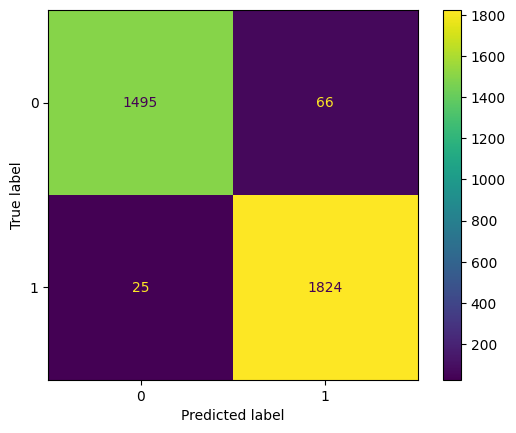

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is K-Nearest Neighbor(KNN) with Accuracy 96.66%